<a href="https://colab.research.google.com/github/fzanart/Socialz/blob/main/toy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
#!pip install cdlib
#!pip install pandas --update
#!pip install xlrd --update

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms, viz, evaluation, BiNodeClustering
from google.colab import drive
drive.mount('/content/drive/')

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'karateclub', 'leidenalg', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}
Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Socialz/cobol_pullrequests.csv', usecols=['login', 'name'])
df

,login,name
0,vim-sroberge,vimaec/g3d
1,vim-sroberge,vimaec/g3d
2,vim-sroberge,vimaec/g3d
3,vim-sroberge,vimaec/g3d
4,mavimaec,vimaec/g3d
...,...,...
1328,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples
1329,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples
1330,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples
1331,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.to_numpy().ravel())

LabelEncoder()

In [ ]:
df['login'] = le.transform(df['login'])
df['name'] = le.transform(df['name'])
df

,login,name
0,247,248
1,247,248
2,247,248
3,247,248
4,173,248
...,...,...
1328,148,58
1329,148,58
1330,148,58
1331,148,58


In [ ]:
# Build the adjacency matrix
am = pd.crosstab(df['login'], df['name']).astype(float)
idx = am.columns.union(am.index)
am = am.reindex(index = idx, columns=idx, fill_value=0.0)

Graph with 262 nodes and 192 edges


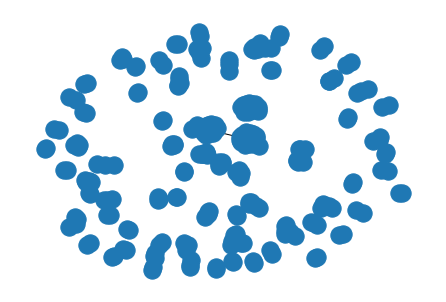

In [ ]:
# Build graph from matrix, before user-user connections
G = nx.from_numpy_matrix(am.to_numpy())
#fig = plt.figure(1, figsize=(40, 16), dpi=120)
nx.draw(G) #with_labels = True
print(nx.info(G))

In [ ]:
am

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
res = list(set([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]))

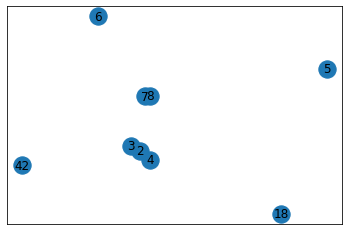

In [ ]:
k = G.subgraph(res)  
nx.draw_networkx(k)

In [ ]:
for line in nx.generate_edgelist(k, data=False):
    print(line)

2 3
2 4
7 8


In [ ]:
nodes = pd.DataFrame(nx.degree(k))
nodes['t'] = 'v'
nodes = nodes.rename(columns={0:'#', 1:0})

nodes = nodes[['t', '#', 0]]
nodes[0] = nodes[0].replace(1,2)
nodes

,t,#,0
0,v,2,2
1,v,3,2
2,v,4,2
3,v,5,0
4,v,6,0
5,v,7,2
6,v,8,2
7,v,42,0
8,v,18,0


In [ ]:
# writePath = '/content/drive/MyDrive/Socialz/gspan_test.txt'
# with open(writePath, 'a') as f:
#     dfAsString = nodes.to_string(header=True, index=False)
#     f.write(dfAsString)

In [ ]:
edges = pd.DataFrame(nx.edges(k))
edges['t'] = 'e'
edges['l'] = 2
edges = edges[['t', 0,1,'l']]
edges

,t,0,1,l
0,e,2,3,2
1,e,2,4,2
2,e,7,8,2


In [ ]:
# writePath = '/content/drive/MyDrive/Socialz/gspan_test2.txt'
# with open(writePath, 'a') as f:
#     dfAsString = edges.to_string(header=False, index=False)
#     f.write(dfAsString)

In [ ]:
!pip install gspan-mining

In [ ]:
from gspan_mining.config import parser
from gspan_mining.main import main
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
args_str = '-s 2 -d True -p True /content/drive/MyDrive/Socialz/otherexample.txt'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

t # 0
v 0 2
v 1 2
e 0 1 2

Support: 2


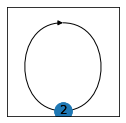


-----------------

t # 1
v 0 2
v 1 2
v 2 2
e 0 1 2
e 0 2 2

Support: 2


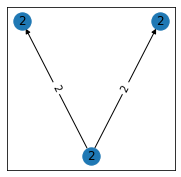


-----------------

Read:	0.0 s
Mine:	0.56 s
Total:	0.56 s


In [ ]:
gs = main(FLAGS)

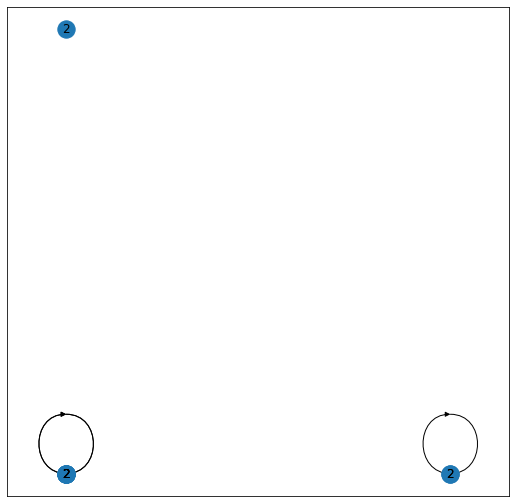

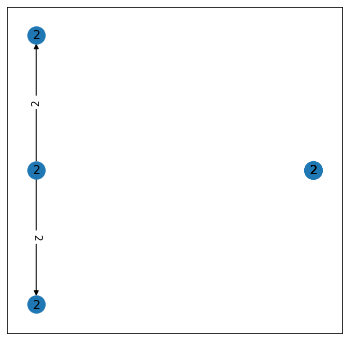

In [ ]:
for g in gs.graphs.values():
    g.plot()